In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/GENAI/FLIPKART-RECOMENDATION/data/flipkart_reviews_dataset.csv")
data.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114


In [3]:
data.columns

Index(['product_id', 'product_title', 'rating', 'summary', 'review',
       'location', 'date', 'upvotes', 'downvotes'],
      dtype='object')

In [4]:
data = data[["product_title", "review"]]

In [5]:
data.head()

,product_title,review
0,BoAt Rockerz 235v2 with ASAP charging Version ...,1-more flexible2-bass is very high3-sound clar...
1,BoAt Rockerz 235v2 with ASAP charging Version ...,Super sound and good looking I like that prize
2,BoAt Rockerz 235v2 with ASAP charging Version ...,Very much satisfied with the device at this pr...
3,BoAt Rockerz 235v2 with ASAP charging Version ...,"Nice headphone, bass was very good and sound i..."
4,BoAt Rockerz 235v2 with ASAP charging Version ...,Sound quality super battery backup super quali...


# Convert Data into Dcoument Fromat
[
   Document(metadata={'product_name': 'BoAt BassHeads 100 Wired Headset'}, page_content='a very good earphone in budget sound is awesome very pure sound but the bass is ok ok..  you can go for it without thinking much')
]


In [6]:
product_list = []

## Itrate over the rows of the DataFrame

for index, row in data.iterrows():
  object = {
      "product_name": row["product_title"],
      "review": row["review"]
  }

  ## Append the object to the product list

  product_list.append(object)

In [7]:
product_list[0]

{'product_name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset',
 'review': "1-more flexible2-bass is very high3-sound clarity is good 4-battery back up to 6 to 8 hour's 5-main thing is fastest charging system is available in that. Only 20 min charge and get long up to 4 hours back up 6-killing look awesome 7-for gaming that product does not support 100% if you want for gaming then I'll recommend you please don't buy but you want for only music then this product is very well for you.. 8-no more wireless headphones are comparing with that headphones at this pric..."}

In [8]:
from langchain_core.documents import Document

In [9]:
docs = []

for object in product_list:
  metadata = {"product_name": object["product_name"]}
  page_content = object["review"]

  doc = Document(page_content= page_content, metadata= metadata)

  docs.append(doc)


In [10]:
docs[0]

Document(metadata={'product_name': 'BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset'}, page_content="1-more flexible2-bass is very high3-sound clarity is good 4-battery back up to 6 to 8 hour's 5-main thing is fastest charging system is available in that. Only 20 min charge and get long up to 4 hours back up 6-killing look awesome 7-for gaming that product does not support 100% if you want for gaming then I'll recommend you please don't buy but you want for only music then this product is very well for you.. 8-no more wireless headphones are comparing with that headphones at this pric...")

In [11]:
len(docs)

9374

In [12]:
from dotenv import load_dotenv
load_dotenv()
import os
GROQ_API_KEY=os.getenv('GROQ_API_KEY')
ASTRA_DB_APPLICATION_TOKEN=os.getenv('ASTRA_DB_APPLICATION_TOKEN')
ASTRA_DB_API_ENDPOINT=os.getenv('ASTRA_DB_API_ENDPOINT')

In [13]:
from langchain_huggingface import HuggingFaceEmbeddings
model_name="sentence-transformers/all-mpnet-base-v2"
embeddings=HuggingFaceEmbeddings(model_name=model_name)

c:\Users\anil.nagamunthala\anaconda3\envs\flipkart\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [14]:
from langchain_astradb import AstraDBVectorStore

vector_store = AstraDBVectorStore(
    collection_name="FLIPKART_RECOMMENDATION",
    embedding=embeddings,
    api_endpoint=ASTRA_DB_API_ENDPOINT,
    token=ASTRA_DB_APPLICATION_TOKEN
)

In [15]:
from uuid import uuid4

uuids = [str(uuid4()) for _ in range(len(docs))]
vector_store.add_documents(documents=docs, ids=uuids)

['b3b367ef-a278-4ac6-875f-207e4e89fdf3',
 'e4f1050b-157f-4a45-96ab-33d9318cd57c',
 '69299721-6a19-4b7a-95a3-689cfb875fcc',
 'b2c4b287-63f7-4987-aea2-96ad55c9011b',
 '799d1cba-54a2-4505-8c6d-cb489e86ea37',
 'b0327759-d793-4e5d-834b-12df594184c1',
 '6abb706c-8f74-4b03-a341-5dc610aa7201',
 '57af7af2-1b07-4222-95ec-01cb3d873840',
 'f0ff1c99-e6ef-4abf-999e-dd78b710f2b1',
 '837b0fc3-24d9-4742-91a8-91eb9afde99f',
 '96e7a457-7536-4028-b6f7-fe3fcf336e1d',
 'aa817ed2-a93a-4205-9fd5-f94fff3ba24a',
 'dadc2d2d-33e0-462e-b90d-547e46e117dd',
 '12aeba1c-23db-45a7-aa94-aa2ce13151a2',
 '9a3ff185-82d7-4cdb-a09b-b470396d32e4',
 '6ec5243f-2b30-464f-aa24-04baece3b287',
 '2575fae2-c963-4660-be0a-9535c325366c',
 '68188fe0-e9f1-489a-a179-29b45557b35d',
 'c3c6ddac-68cc-4b63-91be-8a4eb2f17785',
 '82fb0f2d-de52-41cc-94bf-4a03926dc557',
 'f4b6e55c-90d8-4e01-8db8-bba07d7eddc8',
 '4c3503f9-5b19-4e3e-b17b-894c958034ff',
 '049195b3-bc12-4bfd-85d0-d5709f595b59',
 'b1f56c20-81fd-4188-a045-3a8a20e264df',
 '2fe0ba2b-8dab-

In [16]:
from langchain_groq import ChatGroq

In [17]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import MessagesPlaceholder
from langchain.chains import create_history_aware_retriever

In [18]:
GROQ_API_key=os.getenv('GROQ_API_key')
model = ChatGroq(groq_api_key = GROQ_API_key, model="mixtral-8x7b-32768", temperature=0.5)

In [ ]:
retrieval=vector_store.as_retriever(search_kwargs={'k':5})

In [44]:
retrieval.invoke('can you tell me the best buds?')

[Document(id='87f3a470-fa4c-436c-b99d-cd72bdbb160e', metadata={'product_name': 'realme Buds Q Bluetooth Headset'}, page_content='Nice buds'),
 Document(id='0768456a-98d5-4af1-bccf-13d000dc9f15', metadata={'product_name': 'OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset'}, page_content='Best 👍'),
 Document(id='031d9f77-b171-4352-a14e-6f15519133ca', metadata={'product_name': 'realme Buds Q Bluetooth Headset'}, page_content='Best in class')]

## Allowing Memory

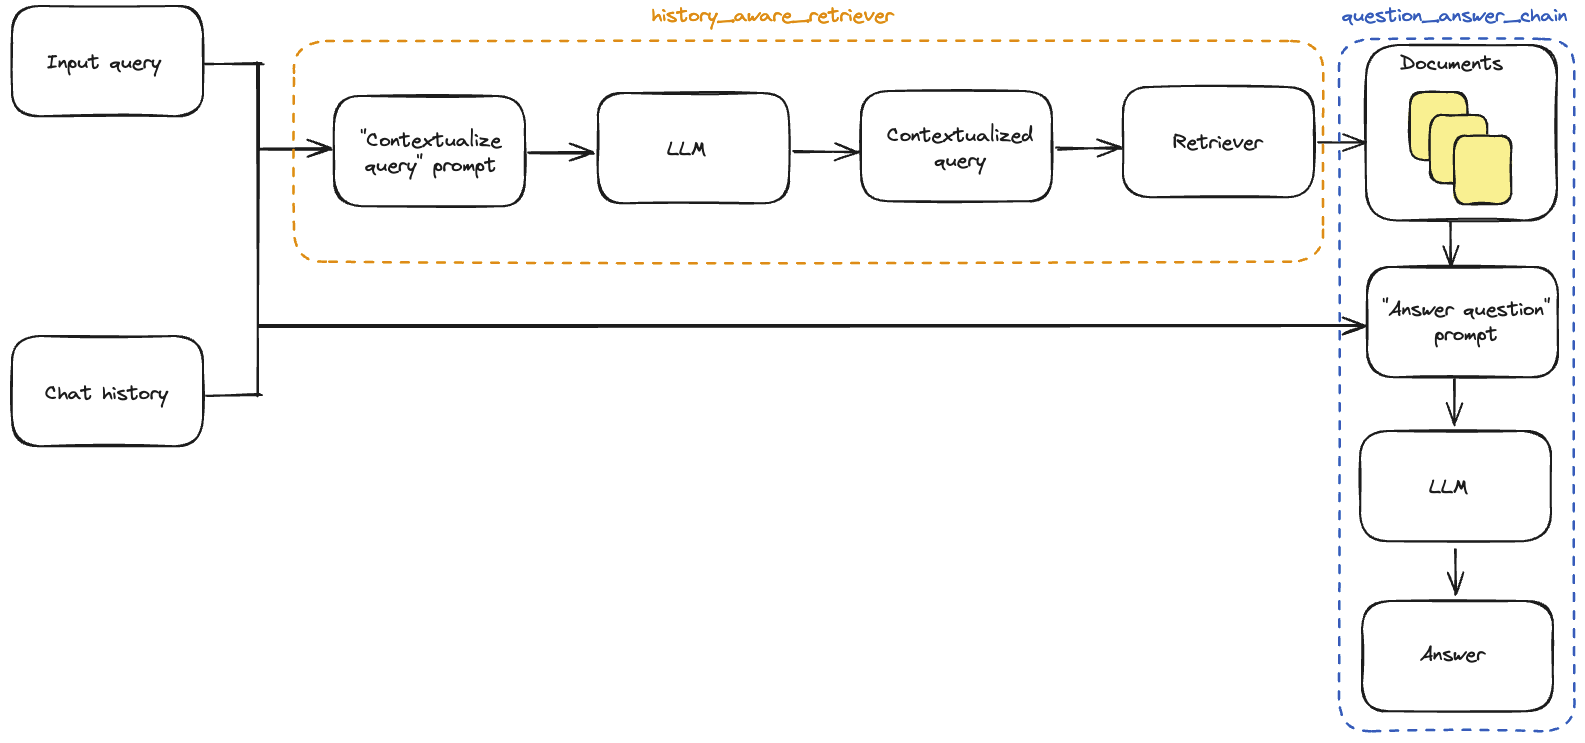

In [64]:
from langchain.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain,create_history_aware_retriever
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage

In [65]:
retriever_prompt = (
    "Given a chat history and the latest user question which might reference context in the chat history,"
    "formulate a standalone question which can be understood without the chat history."
    "Do NOT answer the question, just reformulate it if needed and otherwise return it as is."
)

In [69]:
contextualize_q_prompt  = ChatPromptTemplate.from_messages(
    [
        ("system", retriever_prompt),
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{input}"),


     ]
)

In [70]:
history_aware_retriever=create_history_aware_retriever(model,retrieval,contextualize_q_prompt)

In [71]:
system_prompt= """
    Your ecommercebot bot is an expert in product recommendations and customer queries.
    It analyzes product titles and reviews to provide accurate and helpful responses.
    Ensure your answers are relevant to the product context and refrain from straying off-topic.
    Your responses should be concise and informative.

    CONTEXT:
    {context}

    QUESTION: {input}

    YOUR ANSWER:

    """

In [72]:

qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)

In [73]:
question_answer_chain = create_stuff_documents_chain(model, qa_prompt)

In [74]:
rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

In [78]:
from langchain_core.messages import HumanMessage, AIMessage

In [86]:
chat_history = []
     

question1 = "can u tell me the best wireless buds"

In [87]:
message1= rag_chain.invoke({"input": question1, "chat_history": chat_history})['answer']

In [88]:
print(message1)

Sure, I'd be happy to help! Based on product titles and reviews, some of the best wireless earbuds on the market include:

1. Jabra Elite Active 75t - These earbuds are known for their comfortable fit, great sound quality, and long battery life. They're also waterproof and have a built-in heart rate monitor.
2. Sony WF-1000XM4 - These earbuds offer excellent noise-cancelling capabilities, as well as clear and detailed sound quality. They're also comfortable to wear and have a long battery life.
3. Bose QuietComfort Earbuds - These earbuds are known for their superior noise-cancelling technology, as well as their comfortable fit and high-quality sound. They also have a transparency mode that allows you to hear your surroundings when needed.
4. Anker Liberty Air 2 Pro - These earbuds offer customizable sound and noise-cancelling features, as well as a comfortable fit and long battery life. They're also relatively affordable compared to other high-end earbuds.

I hope this helps! Let me k

In [89]:
store={}

In [90]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [92]:
def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store['session_id']=ChatMessageHistory()

    return store['session_id']


In [93]:
conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer",
)

In [95]:
conversational_rag_chain.invoke(
    {"input": "can u tell me the best wireless buds"},
    config={
        "configurable": {"session_id": "abc123"}
    },  # constructs a key "abc123" in `store`.
)["answer"]

"Sure, I'd be happy to help! Based on product titles and reviews, some of the best wireless earbuds include:\n\n1. Jabra Elite Active 75t - These earbuds are known for their comfortable fit, great sound quality, and long battery life. They are also waterproof and have noise-cancelling technology.\n2. Sony WF-1000XM4 - These earbuds offer exceptional sound quality, noise cancellation, and a long battery life. They also have a customizable fit and touch controls.\n3. Anker Liberty Air 2 Pro - These earbuds offer customizable sound profiles, noise cancellation, and a comfortable fit. They also have a long battery life and are water-resistant.\n4. Bose QuietComfort Earbuds - These earbuds are known for their noise-cancelling technology, comfortable fit, and great sound quality. They also have a long battery life and touch controls.\n5. Beats Studio Buds - These earbuds offer great sound quality, noise cancellation, and a comfortable fit. They are also water-resistant and have a long batter

In [96]:
conversational_rag_chain.invoke(
    {"input": "what is the best one among them"},
    config={
        "configurable": {"session_id": "abc123"}
    },  # constructs a key "abc123" in `store`.
)["answer"]

'Based on the product context provided, the "Best Bluetooth" and "smooth earphone" seem to describe the same product. Narrowing it down to brand and value for money, I would recommend the Anker Soundcore Life A2 NC. It is a popular brand that offers good value for money with its high-quality sound and comfortable fit. It also has Bluetooth capability and generally receives positive reviews for its smooth and seamless connectivity.'